In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
data=pd.read_csv('/content/dataset_diperbaiki.csv')

In [3]:
#top values of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.0,35.00,168.93,33.6,0.627,50.0,1
1,1,93.33,66.0,29.00,68.90,26.6,0.351,31.0,0
2,8,183.00,64.0,21.61,242.68,23.3,0.672,32.0,1
3,1,89.00,66.0,23.00,94.00,28.1,0.167,21.0,0
4,0,137.00,40.0,35.00,168.00,43.1,10.000,33.0,1


In [4]:
#bottom dataset values
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63.0,0
764,2,122.0,70.0,27.00,168.75,36.8,0.340,27.0,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30.0,0
766,1,126.0,60.0,28.47,159.46,30.1,0.349,47.0,1
767,1,93.0,70.0,31.00,68.83,30.4,0.315,23.0,0


***Missing Values & Duplicat values***

In [5]:
#check missing values
missing_values=data.isnull().sum()
missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
#duplication check
duplicate_values=data.duplicated().sum()
duplicate_values

0

***Statistical***

In [7]:
# Info on data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
#Summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,131.791120,72.307643,29.052422,158.132227,33.251544,0.941641,33.201211,0.348958
std,3.369578,59.135345,11.741614,9.432624,102.594725,7.836622,2.091769,11.537375,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.040000,90.000000,27.800000,0.248750,24.000000,0.000000
50%,3.000000,119.000000,72.000000,29.000000,133.860000,32.800000,0.395500,29.000000,0.000000
75%,6.000000,144.000000,80.000000,35.000000,189.790000,36.956500,0.678500,40.010000,1.000000
max,17.000000,537.000000,122.000000,99.000000,846.000000,68.800000,10.000000,81.000000,1.000000


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Replace zero values in certain columns with NaN (potential missing values)
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[zero_columns] = data[zero_columns].replace(0, np.nan)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.0,35.00,168.93,33.6,0.627,50.0,1
1,1,93.33,66.0,29.00,68.90,26.6,0.351,31.0,0
2,8,183.00,64.0,21.61,242.68,23.3,0.672,32.0,1
3,1,89.00,66.0,23.00,94.00,28.1,0.167,21.0,0
4,0,137.00,40.0,35.00,168.00,43.1,10.000,33.0,1


***Explore Data***

In [12]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


***Exploratory Data Analysis (EDA)***

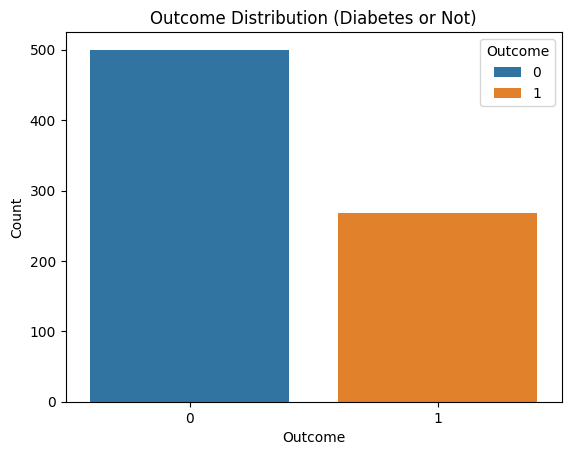

In [13]:
# Visualizing the distribution of the target variable
sns.countplot(x='Outcome', data=data,hue='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution (Diabetes or Not)')
plt.show()

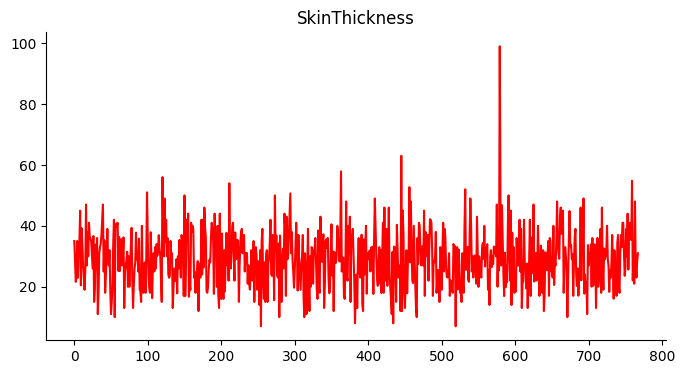

In [14]:
#skinThickiness
data['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness', color='red')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

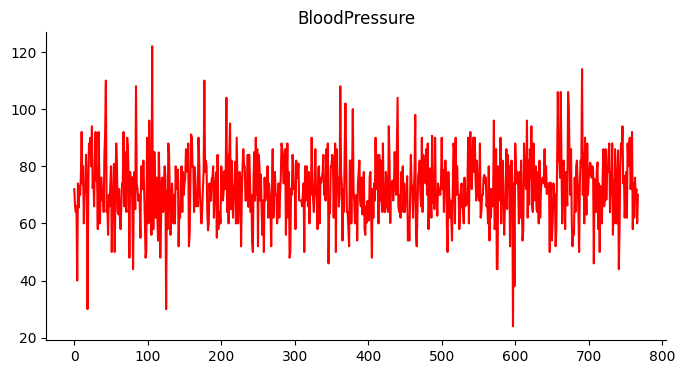

In [15]:
#BloodPressure
data['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure',color='red')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

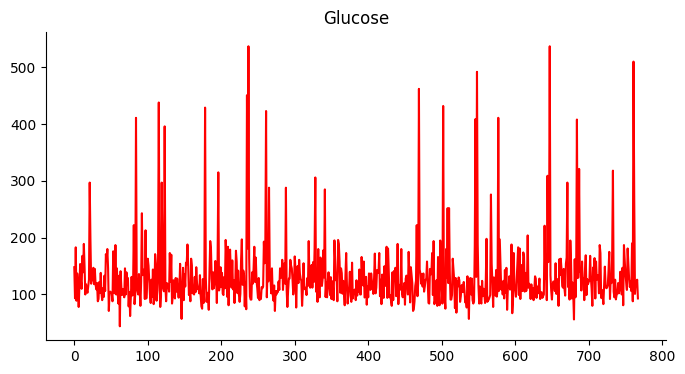

In [16]:
#Glucose
data['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose',color='red')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

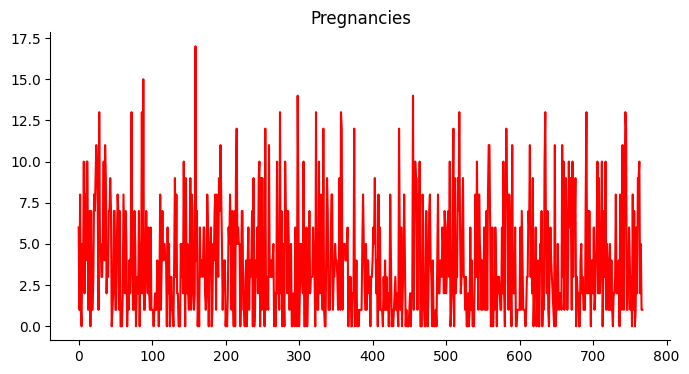

In [17]:
#Pregnancies
data['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies',color='red')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

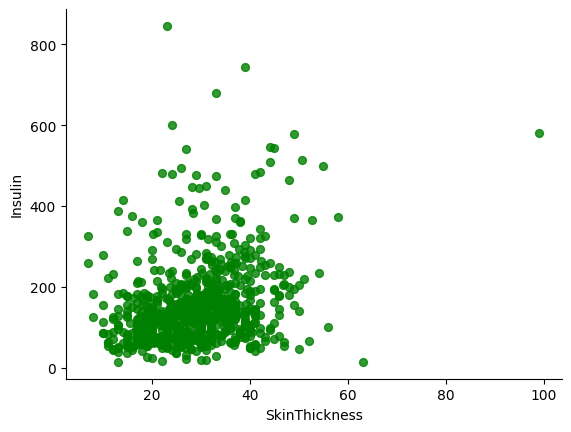

In [18]:
#SkinThickness vs Insulin
data.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=0.8, color='green')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

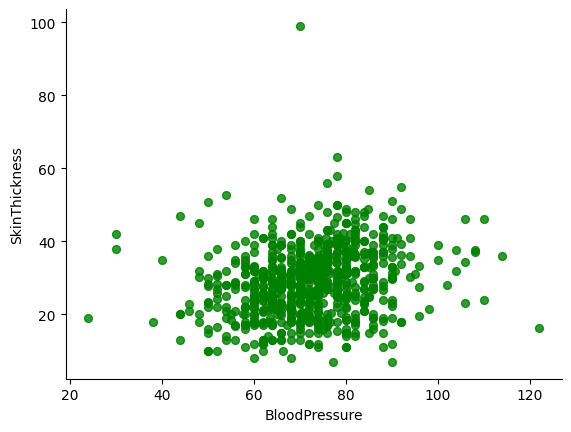

In [19]:
#BloodPressure vs SkinThickness
data.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8,color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

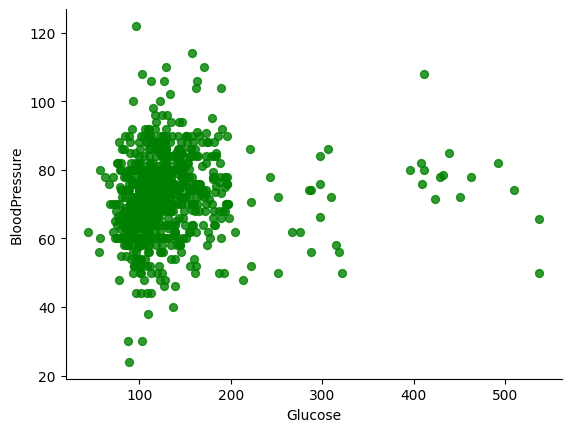

In [20]:
#Glucose vs BloodPressure
data.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8,color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

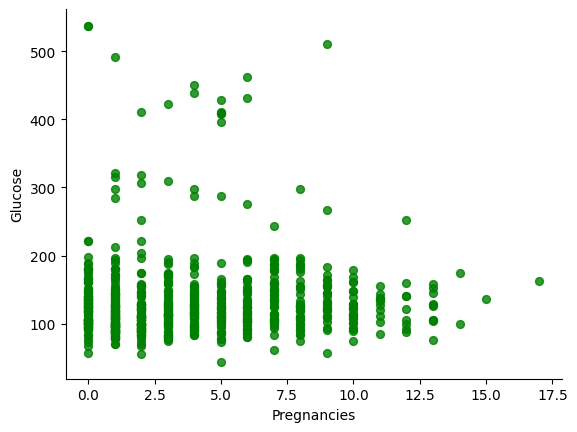

In [21]:
#Pregnancies vs Glucose
data.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8,color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

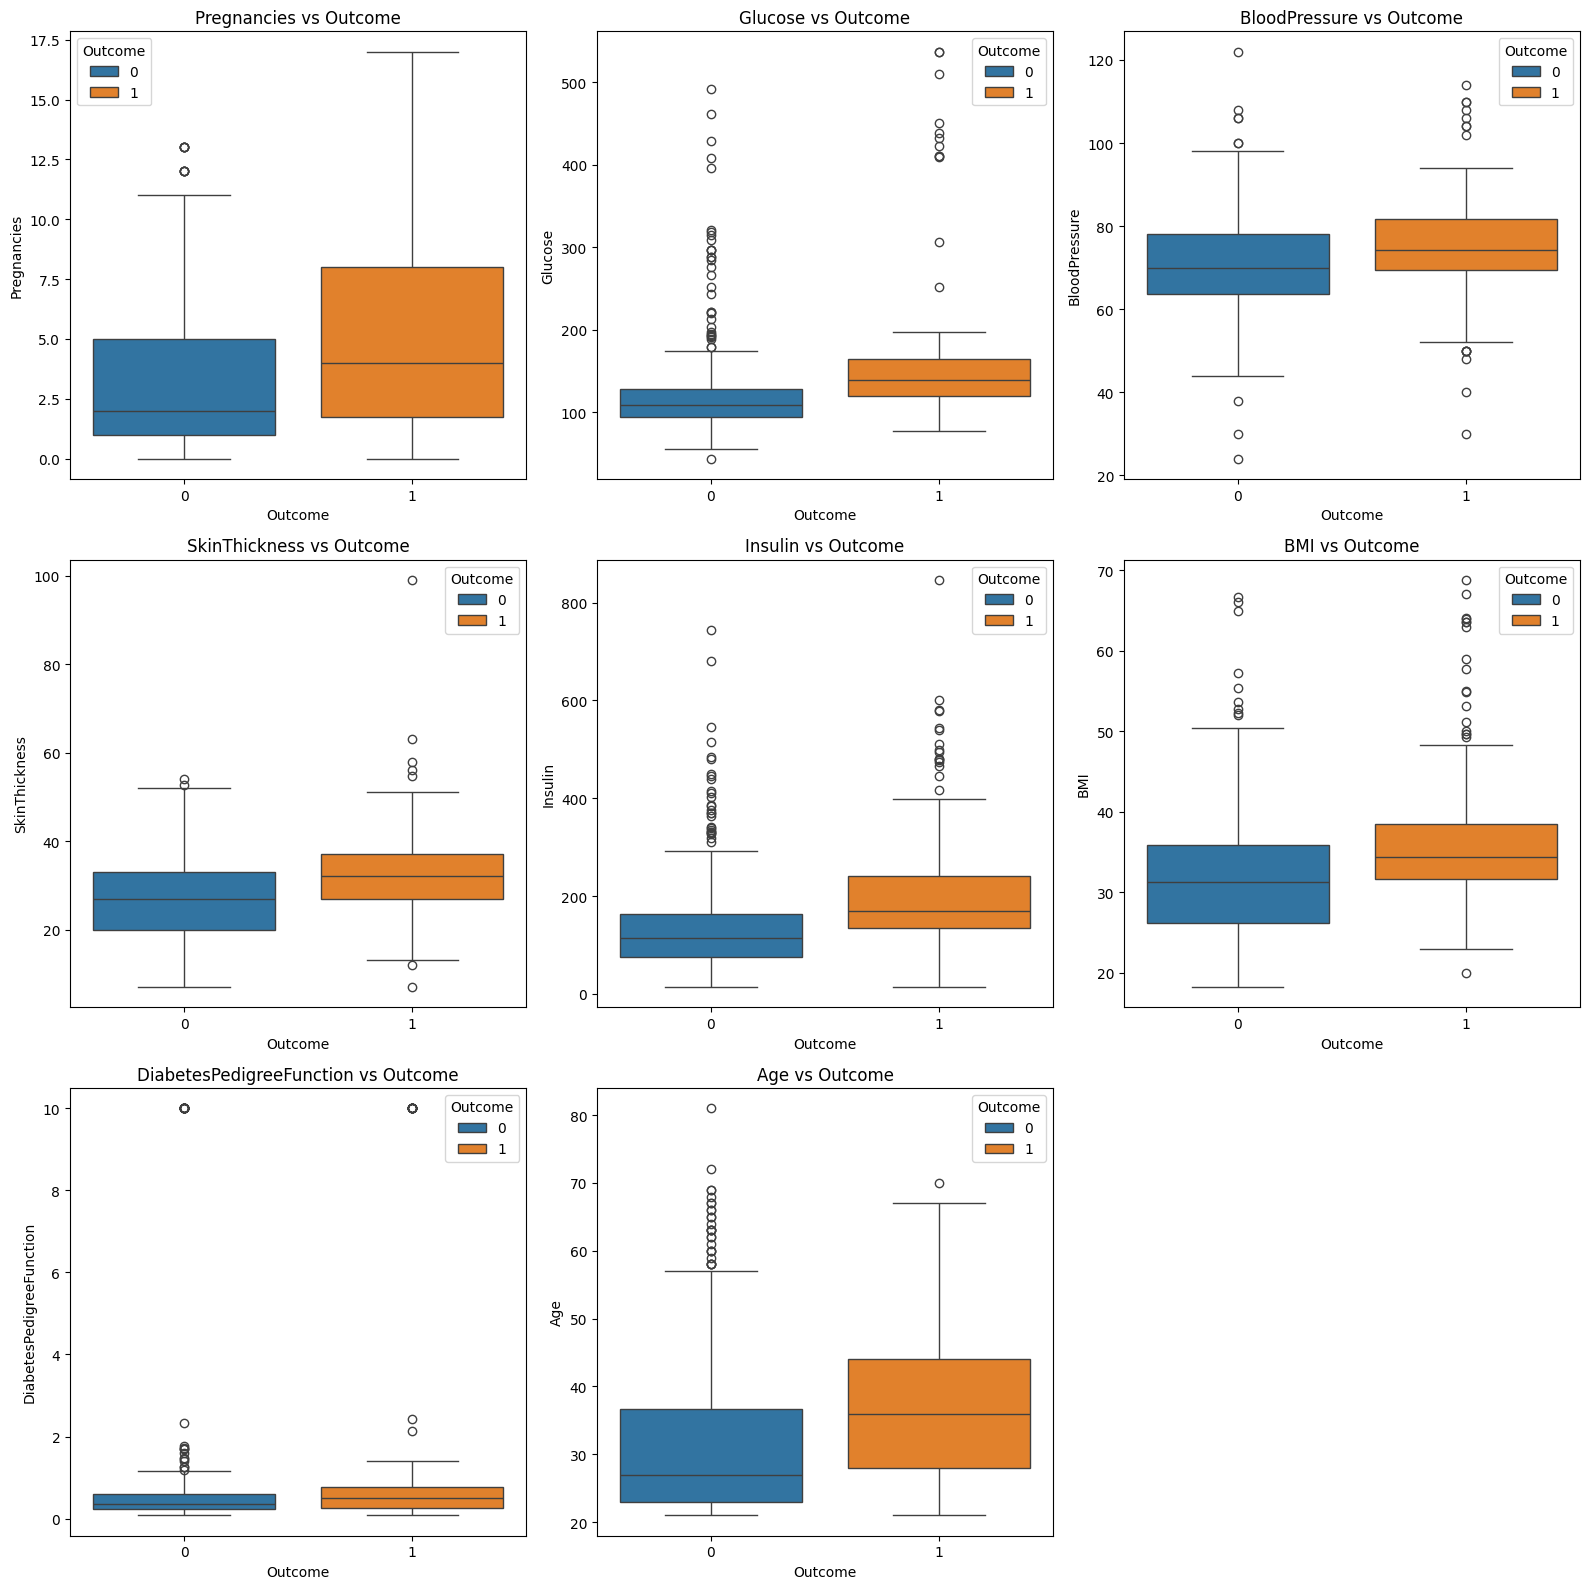

In [22]:
# Boxplots of Features vs Outcome
plt.figure(figsize=(16,16))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Outcome', y=col, data=data,hue='Outcome')
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

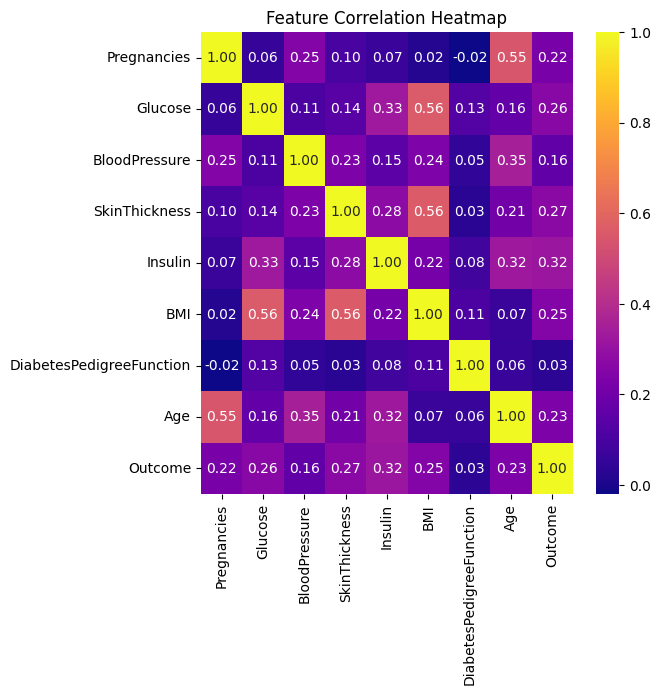

In [23]:
# Correlation Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

***Splitting data***

In [24]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

***Scale Data***

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale=StandardScaler()

In [27]:
#Scale the data for better performance of models
scale_data=scale.fit_transform(x)

***Train Test Split data***

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(scale_data,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [31]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)

SVC(probability=True)

In [33]:
# Neural Network Model
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(x_train, y_train)

MLPClassifier(max_iter=1000)

In [34]:
# Make predictions
gb_preds = gb_model.predict(x_test)
svm_preds = svm_model.predict(x_test)
nn_preds = nn_model.predict(x_test)

In [35]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [36]:
# Calculate F1 Score and AUC-ROC for each model
gb_f1 = f1_score(y_test, gb_preds)
svm_f1 = f1_score(y_test, svm_preds)
nn_f1 = f1_score(y_test, nn_preds)

In [37]:
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(x_test)[:, 1])
svm_auc = roc_auc_score(y_test, svm_model.predict_proba(x_test)[:, 1])
nn_auc = roc_auc_score(y_test, nn_model.predict_proba(x_test)[:, 1])

print(f"Gradient Boosting F1: {gb_f1:.4f}, AUC-ROC: {gb_auc:.4f}")
print(f"SVM F1: {svm_f1:.4f}, AUC-ROC: {svm_auc:.4f}")
print(f"Neural Network F1: {nn_f1:.4f}, AUC-ROC: {nn_auc:.4f}")

Gradient Boosting F1: 0.5946, AUC-ROC: 0.7877
SVM F1: 0.6055, AUC-ROC: 0.7748
Neural Network F1: 0.6018, AUC-ROC: 0.7809


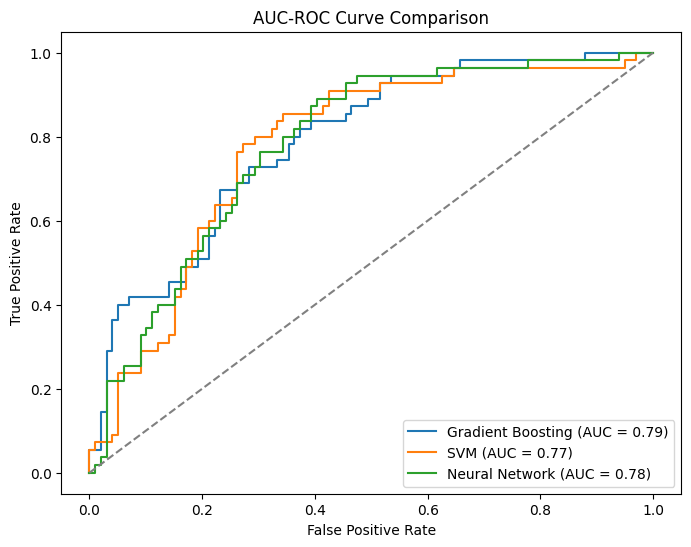

In [38]:
# Plot AUC-ROC curves
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(x_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(x_test)[:, 1])
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison')
plt.legend()
plt.show()

**Insights for Healthcare Professionals**
Based on the model's predictions, you can suggest early intervention steps
**For example**, if the model predicts a high likelihood of diabetes, the healthcare provider can recommend lifestyle changes or further testing.